In [2]:
%cd ../

/Users/toz/Documents/workspace/Circle-of-Doom


In [89]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("husl", 8));
# see http://matplotlib.org/users/customizing.html
sns.mpl.rc("figure", figsize=(16,4)) # sns.set_style({'figure.figsize' : (16,4)})

In [4]:
df = pd.read_csv('data/tw-sp.csv')
print('Header:',', '.join(df.columns.values))
print('Number of rows and columns:',df.shape)

Header: dt, outlet, rt, fav, sp, href
Number of rows and columns: (16530, 6)


In [42]:
def getCat(x):
    pieces = x.href.split('/')

    if x.outlet == 'CNN':
        return pieces[-3]
    elif x.outlet == 'NYT':
        return pieces[-2]
    elif x.outlet == 'ABC':
        return pieces[-3]
    elif x.outlet == 'NBCNews':
        return pieces[-3]
    elif x.outlet == 'CBSNews':
        return pieces[-3]
    elif x.outlet == 'FoxNews':
        return pieces[3]
    elif x.outlet == 'AP':
        return pieces[-3]
    elif x.outlet == 'WPOST':
        return pieces[3]
#cats = df[df.outlet=='WPOST'].apply(getCat,axis=1)
df['cats'] = df.apply(getCat,axis=1)
#cats = cats[~cats.str.contains('-|\d')]
df.cats.unique()

array(['International', 'US', 'Travel', 'Technology', 'Health', 'Sports',
       'Politics', 'Entertainment', 'Lifestyle', 'Business', 'This_Week',
       'WNT', 'WorldNews', 'News', 'storyline', 'news', 'business',
       'pop-culture', 'science', 'tech', 'politics', 'health',
       'www.nbcnews.com', '2016-election', 'how-to', 'world',
       'entertainment', 'us', 'story', 'opinion', 'leisure',
       'economy-policy', 'tv', 'weather', '2015', 'sports', 'travel',
       'music', '50275-bringing-back-woolly-mammoth-dna.html?',
       '50292-aral-sea-radar-image.html?',
       '50268-jerusalem-latrine-parasites.html?', 'articles',
       '28933-astronaut-scott-kelly-yearlong-space-patches.html?',
       '28924-one-year-space-station-mission-science.html?',
       '50236-boeing-device-could-block-shock-waves.html?',
       '50242-shape-shifting-frog-discovered.html?',
       'senate-dems-poised-to-drop-objection-to-doc-fix-bill', 'cars',
       'social-media',
       '50229-ancient-sa

In [64]:
a = pd.pivot_table(df,index=["cats"],values=["href"],aggfunc=len).sort('href',ascending=False)

In [184]:
a[a.href>100]

,href
cats,
02,138
Entertainment,123
Health,166
International,265
Politics,156
Technology,108
US,507
article,1868
asia,142


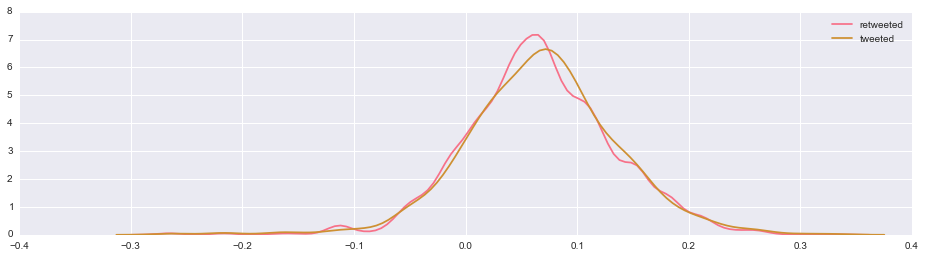

In [158]:
c='politics'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

In [193]:
#df[df.cats=='world'].outlet.unique()
b = pd.pivot_table(df[df.cats.isin(a[a.href>10].index)],index=["cats"],columns=['outlet'],values=["href"],aggfunc=len)
b.fillna('')

href                                              
outlet           ABC    AP CBSNews  CNN FoxNews NBCNews  NYT WPOST
cats                                                              
01                                   48                           
02                                  138                           
03                                   35                           
2015                                         14                   
Business          47                                              
Entertainment    123                                              
Health           166                                              
International    265                                              
Lifestyle         68                                              
Politics         156                                              
Sports            52                                              
Technology       108                                              
Travel            16                                              
US               507                                              
africa                               15                   21      
americas                             23                   31      
article               1868                                        
arts                                                      12      
asia                                 60                   82      
baseball                                                  28      
basketball                                                13      
bigstory.ap.org         26                                        
blogs                                                         1237
books                                                     13      
business                              1             160   72    26
companies                            25                           
dealbook                                                  27      
design                                                    21      
dining                                                    23      
economy                              37                   27      
...              ...   ...     ...  ...     ...     ...  ...   ...
ncaabasketball                                            11      
news                          1952   15       4    1379        754
nyregion                                                 177      
nytnow                                                    42      
opinion                              46      37           55      
opinions                              4                         45
pb                                                              15
personaltech                                              17      
pf                                   12                           
politics                            323     515      77  112   139
pop-culture                                          69           
posteverything                                                  33
realestate                                                23      
review                                                    15      
science                                      45     145   54      
sports                                       60           44     9
story                                        30                   
storyline                                           411           
style                                                     36      
sunday                                                    28      
tech                                 18      54     122           
technology                           51                   41      
television                                                35      
theater                                                   27      
travel                               34      16           38      
upshot                                                    75   

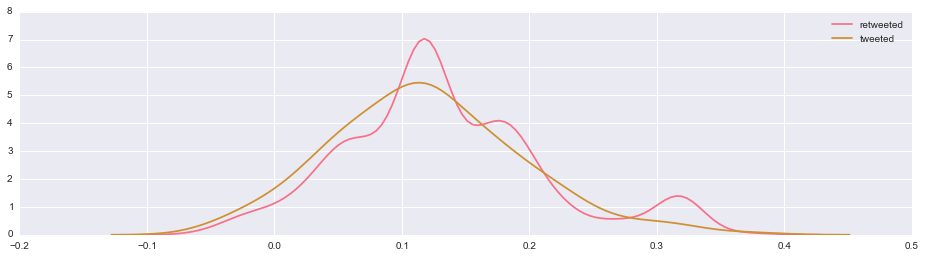

In [192]:
c='health'
sns.kdeplot(rtw[rtw.cats=='tech']['sp'],label='retweeted');
sns.kdeplot(df[df.cats=='tech']['sp'],label='tweeted');

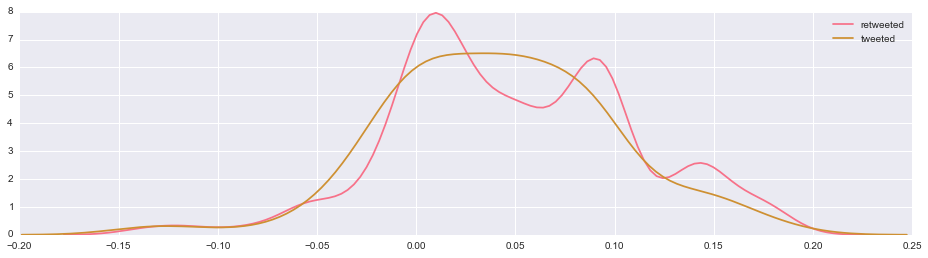

In [189]:
c='europe'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

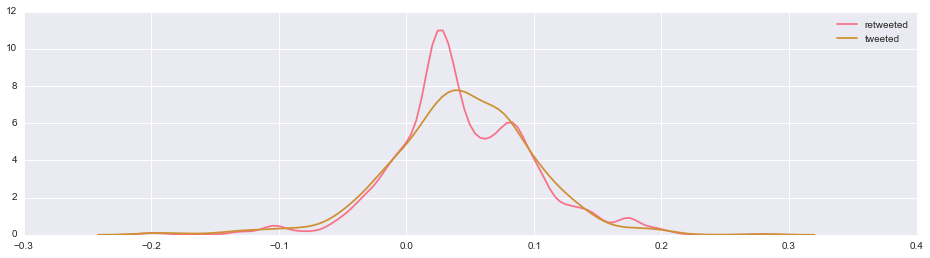

In [159]:
c='world'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

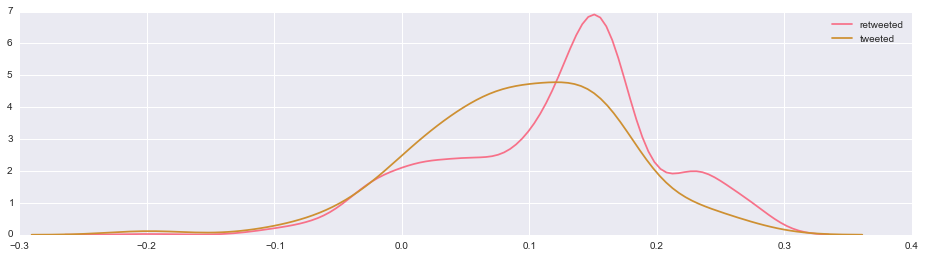

In [160]:
c='sports'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

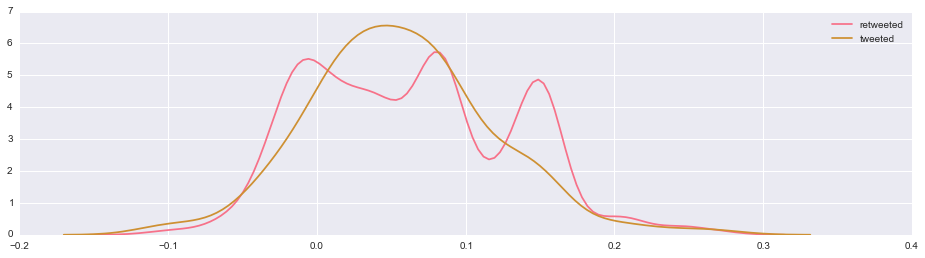

In [163]:
c='middleeast'
sns.kdeplot(rtw[rtw.cats==c]['sp'],label='retweeted');
sns.kdeplot(df[df.cats==c]['sp'],label='tweeted');

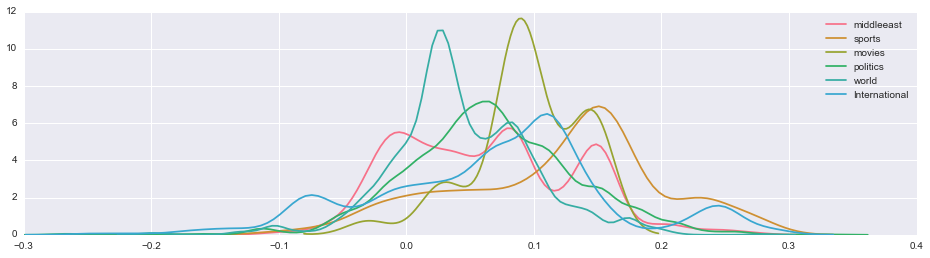

In [155]:
cs = ['middleeast','sports','movies','politics','world','International']
[sns.kdeplot(rtw[rtw.cats==c]['sp'],label=c) for c in cs];

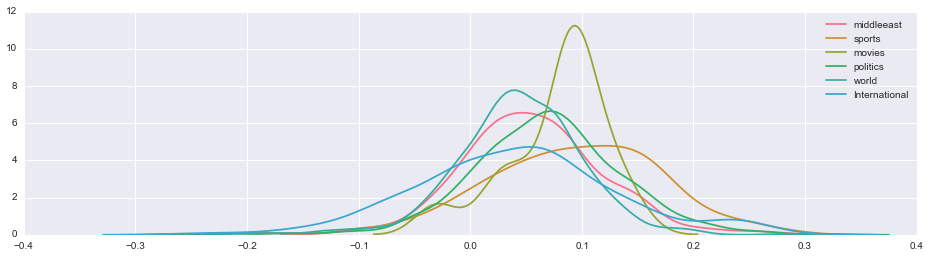

In [94]:
cs = ['middleeast','sports','movies','politics','world','International']
[sns.kdeplot(df[df['cats']==c]['sp'],label=c) for c in cs];

In [152]:
def get_rtw(x):
    a = []
    [a.append(x) for _ in range(int(x.rt/20))]
    return pd.DataFrame(a)

In [153]:
#a = pd.DataFrame(df.groupby('cats').count()['href'])
rtw = pd.DataFrame(columns=df.columns)
for row in df.iterrows():
    rtw = rtw.append(get_rtw(row[1]))

In [80]:
len(df[df.outlet=='NBCNews'].iloc[50].href.split('/'))==5

['http:',
 '',
 'www.nbcnews.com',
 'news',
 'world',
 'hurricane-blanca-barrels-toward-baja-california-peninsula-officials-warn-floods-n371166']

In [47]:
a = df.groupby('cats').count()['href']
a.order(ascending=False)

cats
news                                                                          4104
article                                                                       1868
blogs                                                                         1237
politics                                                                      1166
us                                                                            1091
world                                                                          685
US                                                                             507
storyline                                                                      411
entertainment                                                                  283
health                                                                         266
International                                                                  265
business                                                                       259

In [4]:
df.outlet.unique()

array(['ABC', 'NBCNews', 'CBSNews', 'FoxNews', 'AP', 'WPOST', 'NYT', 'CNN'], dtype=object)

In [40]:
df[df.outlet=='WPOST'].head().href.iloc[0]

'http://www.washingtonpost.com/blogs/wonkblog/wp/2015/04/03/missouri-republicans-are-trying-to-ban-food-stamp-recipients-from-buying-steak-and-seafood/'

In [92]:
cats.name = 'category'

In [97]:
df = df.join(cats,how='inner')

In [98]:
grouped = df.groupby('category')

In [109]:
a = grouped.apply(lambda x: x.spnews.mean()).reset_index()
a = a.rename(columns={0:'sp'})
a

,category,sp
0,africa,0.045061
1,americas,0.019915
2,arts,0.125218
3,asia,0.054342
4,automobiles,0.074541
5,autoracing,0.107559
6,autos,0.115364
7,awardsseason,0.139784
8,baseball,0.106192
9,basketball,0.079406


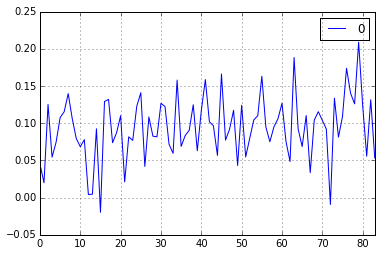

In [108]:
a.plot()